# Primer intento de SOM

## Primero revisaremos si funciona para detectar clusters

In [2]:
from IPython.display import Image, display

from minisom import MiniSom
from sklearn.datasets import load_breast_cancer
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK


import time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import plot,axis,show,pcolor,colorbar,bone


In [3]:
np.random.seed(2020)

In [4]:
devices = pd.read_csv("device_failure.csv", encoding='Latin-1')

In [5]:
devices.columns

Index(['date', 'device', 'failure', 'attribute1', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8',
       'attribute9'],
      dtype='object')

In [16]:
devices.shape[0]

124494

In [6]:
feat_names= ['attribute1', 'attribute2', 'attribute3','attribute4', 
               'attribute5', 'attribute6', 'attribute7', 'attribute8','attribute9']

In [7]:
data = devices[['attribute1', 'attribute2', 'attribute3','attribute4', 
               'attribute5', 'attribute6', 'attribute7', 'attribute8','attribute9']].values
target = devices['failure']

In [8]:
data.shape, target.shape

((124494, 9), (124494,))

In [9]:
data.shape, target.shape

((124494, 9), (124494,))

In [10]:
som_grid_rows = 6
som_grid_columns = 6
iterations = 500
sigma = 2
learning_rate = .1

In [11]:
np.unique(target)

array([0, 1])

In [12]:
target
unique, counts = np.unique(target, return_counts=True)
dict(zip(unique, counts))

{0: 124388, 1: 106}

In [13]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc = MinMaxScaler()
sc

MinMaxScaler()

In [14]:
data_sc = sc.fit_transform(data)
data_sc.shape

(124494, 9)

In [12]:
#?MiniSom

In [17]:
np.sqrt(5*np.sqrt(devices.shape[0]))

42.002206661203424

In [18]:
som = MiniSom(x=som_grid_rows,
             y=som_grid_columns,
             input_len = data_sc.shape[1],
             sigma=sigma, topology = 'rectangular',
             learning_rate=learning_rate)
som.random_weights_init(data)

In [19]:
# entrenamiento

inicial = time.time()

som.train_random(data,iterations)

final = time.time() - inicial

print(final)

0.045758724212646484


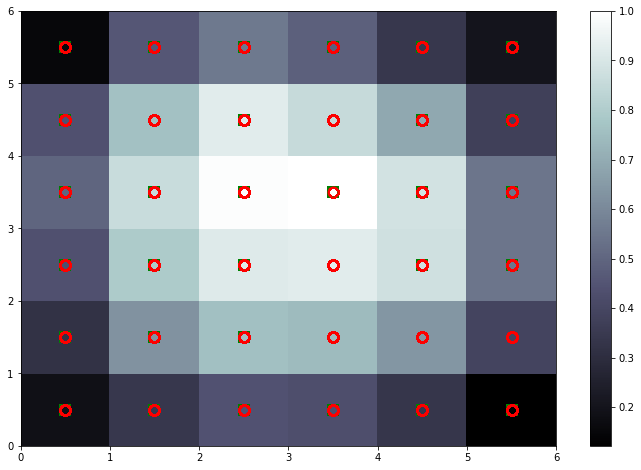

In [20]:
plt.figure(figsize=((12,8)))
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s', 'D']
colors=['r','g', 'b']
for i, x in enumerate(data):
    w = som.winner(x)
    plot(w[0]+.5,
         w[1]+.5,
         markers[target[i]],
        markeredgecolor=colors[target[i]],
        markerfacecolor='None',
        markersize=10,
        markeredgewidth=2)
show()

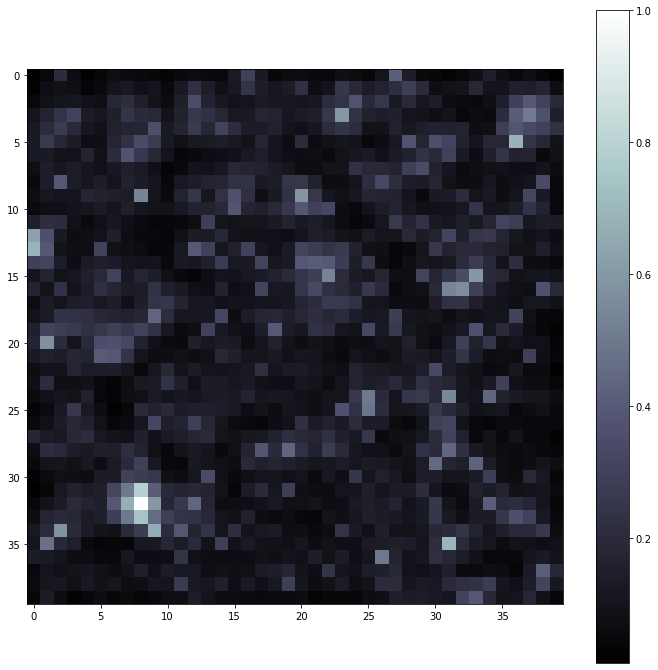

In [33]:
plt.figure(figsize=((12,12)))
plt.imshow(som.distance_map())
plt.colorbar()

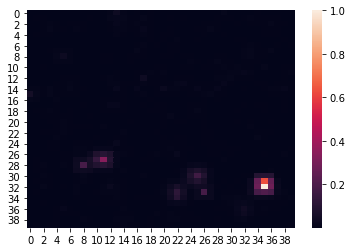

In [22]:
sns.heatmap(som.distance_map())

In [19]:
mappings=som.win_map(data)
len(mappings), type(mappings)

(36, collections.defaultdict)

In [14]:
#mappings

In [19]:
#detecciones = np.concatenate([mappings[(1,1)], mappings[(1,8)]])
#detecciones

In [20]:
#sc.inverse_transform(detecciones)

In [22]:
#dataset = load_breast_cancer()
#target= dataset.target
#target_names = dataset.target_names
data = pd.DataFrame(data_sc, columns=feat_names)
#data.index.name = "SampleID"

In [23]:
data.drop(["attribute1","attribute7"], axis=1, inplace=True)

In [24]:
data.head()

,attribute2,attribute3,attribute4,attribute5,attribute6,attribute8,attribute9
0,0.000862,0.00000,0.031212,0.051546,0.591204,0.0,0.000374
1,0.000000,0.00012,0.000000,0.051546,0.585017,0.0,0.000000
2,0.000000,0.00000,0.000000,0.113402,0.344461,0.0,0.000000
3,0.000000,0.00000,0.000000,0.051546,0.595191,0.0,0.000000
4,0.000000,0.00000,0.000000,0.144330,0.454420,0.0,0.000160


In [25]:
len(target.T)

124494

In [26]:
data["objetivo"] = list(target.T)

In [27]:
x = 40
y = 40
input_len = data.shape[1]

sigma = 1.2

learning_rate = 1.55

iterations = 12000


In [28]:
data = np.array(data)
som = MiniSom(x=x,
              y=y,
              input_len=input_len,
              neighborhood_function='triangle',
              sigma=sigma,
              learning_rate=learning_rate)

som.random_weights_init(data)

/home/qsergio/miniconda3/envs/py.1/lib/python3.6/site-packages/minisom.py:198: UserWarning: sigma should be an integer >=1 when triangle or bubbleare used as neighborhood function
  'are used as neighborhood function')


In [29]:
inicial = time.time()

som.train_random(data, iterations)

final= time.time()- inicial

print(final, "s")

2.073188304901123 s


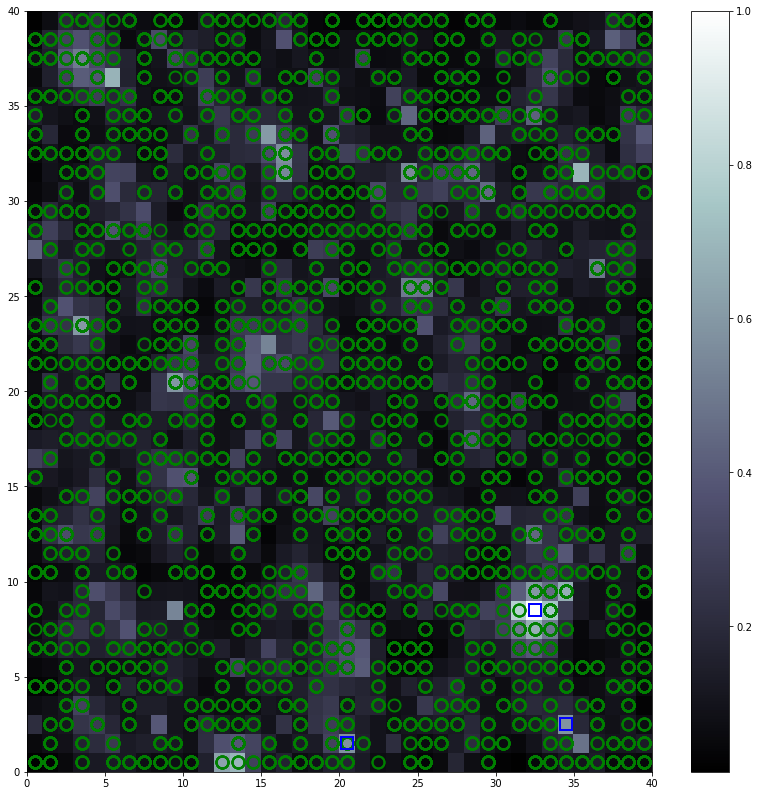

In [30]:
plt.figure(figsize=(14,14))
bone()
pcolor(som.distance_map().T)
colorbar()

markers = ['o','s','D']
colors = ['g','b','r']

for i,j in enumerate(data):
    w = som.winner(j)
    plot(w[0]+.5,
         w[1]+.5,
         markers[target[i]],
        markeredgecolor=colors[target[i]],
        markerfacecolor='None',
        markersize=12,
        markeredgewidth=2)
plt.savefig('som_device_failures3.png')
show()

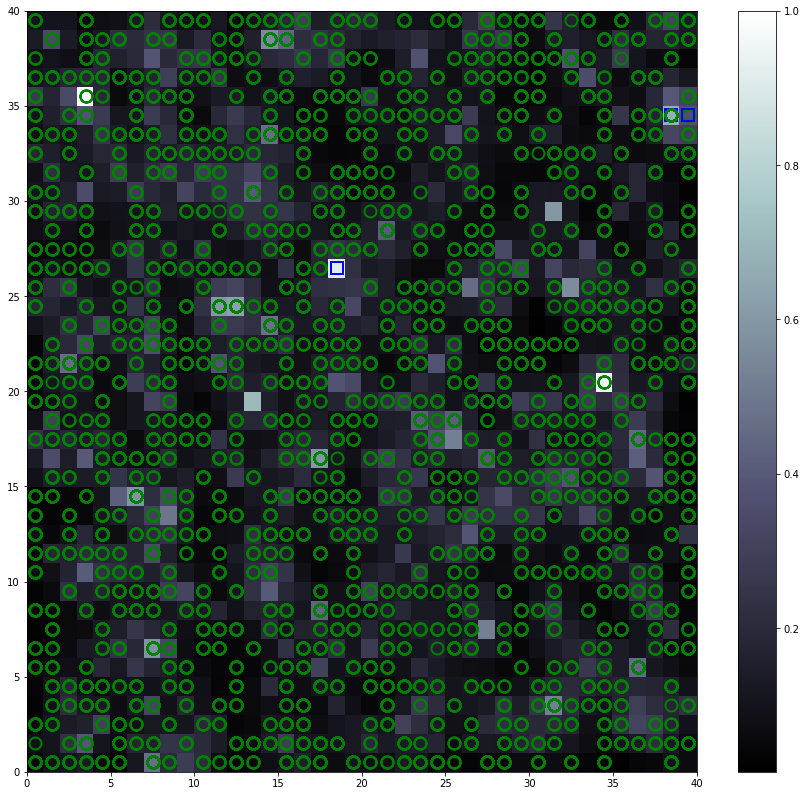

In [39]:
plt.figure(figsize=(15,14))
bone()
pcolor(som.distance_map().T)
colorbar()

markers = ['o','s','D']
colors = ['g','b','r']

for i,j in enumerate(data):
    w = som.winner(j)
    plot(w[0]+.5,
         w[1]+.5,
         markers[target[i]],
        markeredgecolor=colors[target[i]],
        markerfacecolor='None',
        markersize=12,
        markeredgewidth=2)
plt.savefig('som_device_failures_stds.png')
show()

In [31]:
import pickle

In [32]:
# saving the som in the file som.p
with open('som_failures_minmax_best.p', 'wb') as outfile:
    pickle.dump(som, outfile)

In [42]:
outliers_percentage = 0.001

quantization_errors = np.linalg.norm(som.quantization(data) - data, axis=1)
error_treshold = np.percentile(quantization_errors, 
                               100*(1-outliers_percentage))
is_outlier = quantization_errors > error_treshold

/home/sergio/miniconda3/envs/py3.6/lib/python3.6/site-packages/minisom.py:482: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


In [43]:
np.max(quantization_errors)

1.0384172785073413

In [44]:
100*(1-outliers_percentage)

99.9

Text(0, 0.5, 'frequency')

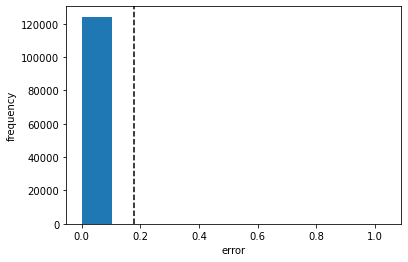

In [45]:
plt.hist(quantization_errors)
plt.axvline(error_treshold, color='k', linestyle='--')
plt.xlabel('error')
plt.ylabel('frequency')

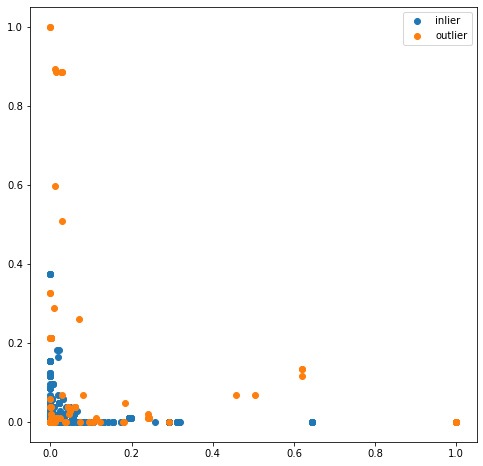

In [46]:
plt.figure(figsize=(8, 8))
plt.scatter(data[~is_outlier, 2], data[~is_outlier, 5],
            label='inlier')
plt.scatter(data[is_outlier, 2], data[is_outlier, 5],
            label='outlier')
plt.legend()
plt.savefig('som_outliers_detection.png')
plt.show()

In [69]:
def entrenamiento(x,y, input_len, sigma, learning_rate):
    som = MiniSom(x=x,
              y=y,
              input_len=input_len,
              sigma=sigma,
              learning_rate=learning_rate)
    som.random_weights_init(data)
    inicial = time.time()
    som.train_random(data, iterations)
    final = time.time()- inicial
    print(final, "s")
    return som

def som_viz(som):
    plt.figure(figsize=(16,16))
    bone()
    pcolor(som.distance_map().T)
    colorbar()

    markers = ['o','s','D']
    colors = ['g','b','r']

    for i,j in enumerate(data):
        w = som.winner(j)
        plot(w[0]+.5,
             w[1]+.5,
             markers[target[i]],
            markeredgecolor=colors[target[i]],
            markerfacecolor='None',
            markersize=12,
            markeredgewidth=2)
    axis([0,som._weights.shape[0],0,som._weights.shape[1]])
    show()

In [71]:
enumerate(data)

In [62]:
rows_data = data.shape[0]

x = 30#int(np.sqrt(5*np.sqrt(rows_data)))
y = x

In [51]:
input_len = data.shape[1]
sigma = 0.003
learning_rate=5
iterations = 100
print("x es {}".format(x))
print("y es {}".format(y))
print("input_len es {}".format(input_len))
print("sigma es {}".format(sigma))
print("learning_rate es {}".format(learning_rate))
print("iterations son {}".format(iterations))

x es 42
y es 42
input_len es 10
sigma es 0.003
learning_rate es 5
iterations son 100


In [52]:
som = entrenamiento(x,y,input_len,3,learning_rate)

0.039229393005371094 s


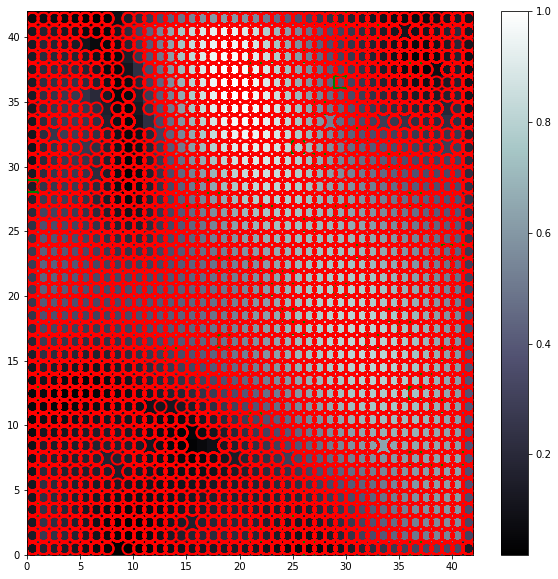

In [35]:
som_viz(som)

# Optimización bayesiana

## optimizando el radio de la vecindad, sigma

In [53]:
inicial = time.time()

opt = fmin(
    fn = lambda qs: MiniSom(x=x,
                             y=y,
                             input_len=input_len,
                             sigma=qs,
                             learning_rate=learning_rate).quantization_error(data),
    space = hp.uniform("qs", 0.001 , x/2.01),
    algo = tpe.suggest,
    max_evals = 200)

final = time.time() - inicial

print(final, "s")
print(opt)

100%|██████████| 200/200 [05:48<00:00,  1.74s/trial, best loss: 0.5582764122024978]
348.0212640762329 s
{'qs': 7.507969856396246}


In [54]:
sigma = opt['qs']

In [57]:
sigma

7.507969856396246

In [55]:
som = entrenamiento(x,y,input_len,sigma,learning_rate)

0.03006720542907715 s


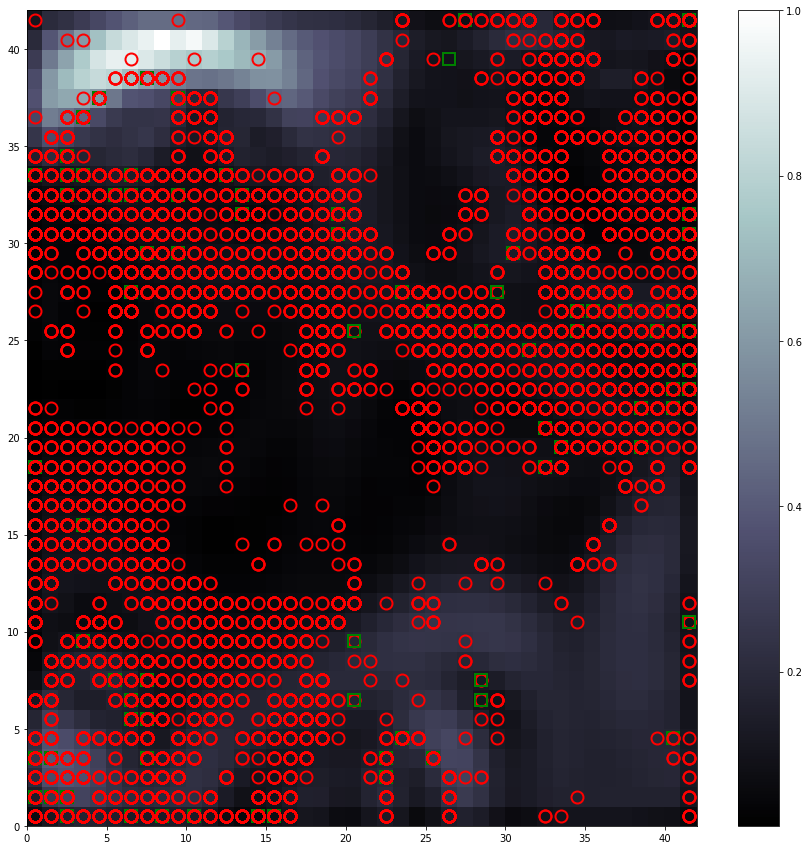

In [56]:
som_viz(som)

## optimizando la constante de aprendizaje

In [58]:
b_grid = {
    'qs': hp.uniform('qs', 0.001, 5),
    'lr': hp.uniform('lr', 0.001, 5)
    
}

In [63]:
def som_opt(b_grid):
    sigma = b_grid['qs']
    learning_rate = b_grid['lr']
    val = MiniSom(x=x,
                 y=y,
                 input_len=input_len,
                 sigma=sigma,
                 learning_rate=learning_rate).quantization_error(data)
    #print(val)
    return {'loss': val, 'status':STATUS_OK} 
    

In [64]:
inicial = time.time()

trials = Trials()

opt = fmin(
    fn = som_opt,
    space = b_grid,
    algo = tpe.suggest,
    max_evals = 250,
    trials = trials)

final = time.time() - inicial

print(final, "s")
print('best:{}'.format(opt))

100%|██████████| 250/250 [04:06<00:00,  1.01trial/s, best loss: 0.6198638230400562]
246.90815663337708 s
best:{'lr': 1.4530151105870566, 'qs': 1.5091997440591063}


In [65]:
for i, trial in enumerate(trials.trials[:2]):
    print(i,trial)

0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.7024312896308911, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'lr': [0], 'qs': [0]}, 'vals': {'lr': [1.278508940607857], 'qs': [3.6559579403783573]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 7, 6, 1, 26, 7, 24000), 'refresh_time': datetime.datetime(2020, 7, 6, 1, 26, 7, 976000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.7315538644657338, 'status': 'ok'}, 'misc': {'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'lr': [1], 'qs': [1]}, 'vals': {'lr': [1.1070431748588554], 'qs': [2.260794103072288]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 7, 6, 1, 26, 7, 977000), 'refresh_time': datetime.datetime(2020, 7, 6, 1, 26, 8, 867000)}


In [74]:
sigma = b_grid['qs']
learning_rate=b_grid['lr']

In [75]:
learning_rate

In [76]:
som = entrenamiento(x,y,input_len,1.5091997440591063,1.4530151105870566)

0.023373842239379883 s


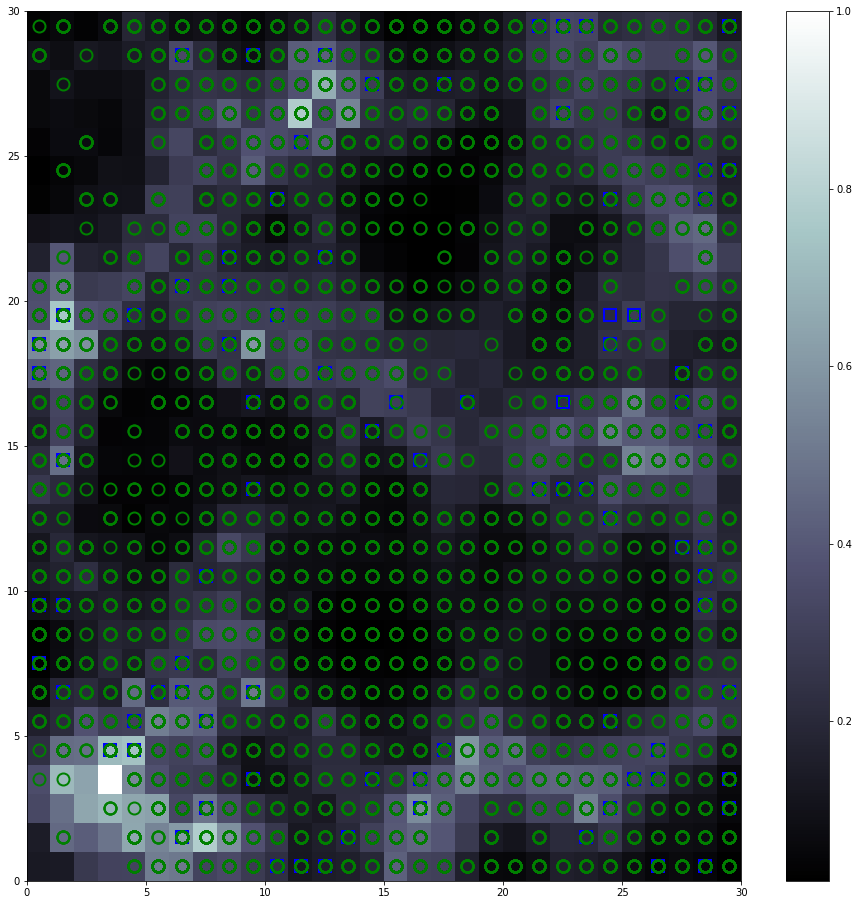

In [77]:
som_viz(som)

# Esto es para una nueva sección

In [ ]:
pca = PCA(.5,random_state=2020)
#scaler = StandardScaler()
#scaler.fit(df[X_cuentas])
x_scal = StandardScaler().fit_transform(df[X_cuentas].values)
pca.fit_transform(x_scal)

In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
pca = PCA(.5,random_state=2020)
#scaler = StandardScaler()
#scaler.fit(df[X_cuentas])
x_scal_r = StandardScaler().fit_transform(df[X_respons].values)
pca.fit_transform(x_scal_r)